In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# URLs das tabelas
url_demo = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT'
url_bmi = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT'
url_glu = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GLU_I.xpt'

In [4]:
# Carregando as tabelas usando pandas
demographic = pd.read_sas(url_demo)
body_measure = pd.read_sas(url_bmi)
df_glucose = pd.read_sas(url_glu)

In [5]:
# Merge das tabelas utilizando o atributo 'SEQN' como chave
df = pd.merge(demographic[['SEQN', 'RIDAGEYR']], body_measure[['SEQN', 'BMXBMI']], on='SEQN')
df = pd.merge(df, df_glucose[['SEQN', 'LBXGLU']], on='SEQN')

In [6]:
# Filtrando os dados para incluir apenas indivíduos entre 20 e 60 anos
df_filtered = df[(df['RIDAGEYR'] >= 20) & (df['RIDAGEYR'] <= 60)]

In [7]:
# Remover dados faltantes
df_filtered = df_filtered.dropna(subset=['BMXBMI', 'LBXGLU'])

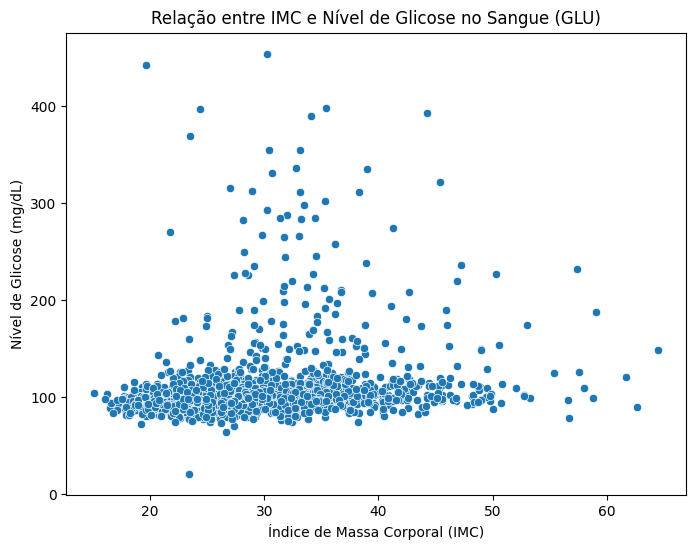

In [9]:
# Visualizar a relação entre IMC e PAS
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMXBMI', y='LBXGLU', data=df_filtered)
plt.title('Relação entre IMC e Nível de Glicose no Sangue (GLU)')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Nível de Glicose (mg/dL)')
plt.show()

In [10]:
# Definir as variáveis dependente (X) e independente (y)
X = df_filtered[['BMXBMI']]
y = df_filtered['LBXGLU']

In [11]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
# Fazer predições
y_pred = model.predict(X)

In [13]:
# Avaliar o modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model.coef_[0]

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente da regressão: {coef:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')


Erro quadrático médio (MSE): 1390.57
Coeficiente da regressão: 0.97
Coeficiente de determinação (R²): 0.04


o valor de $𝑅^2$ (coeficiente de determinação) indica a proporção da variação na PAS explicada pelo IMC.

- Se o valor de $R^2$ for próximo de 1, significa que uma grande parte da variação da PAS é explicada pelo IMC, sugerindo uma forte dependência.

- Se o valor de $R^2$ for próximo de 0, significa que o IMC explica muito pouco da variação da PAS, sugerindo independência ou uma relação fraca.